In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv("./dataset/Loan_Default.csv")
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [2]:
df.isna().sum()
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

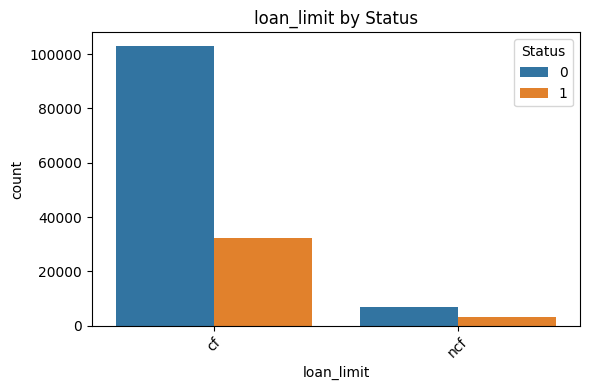

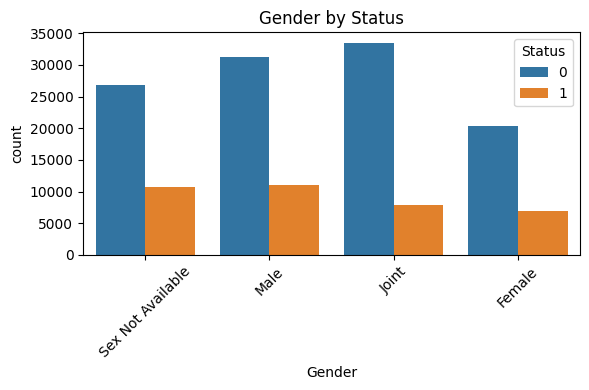

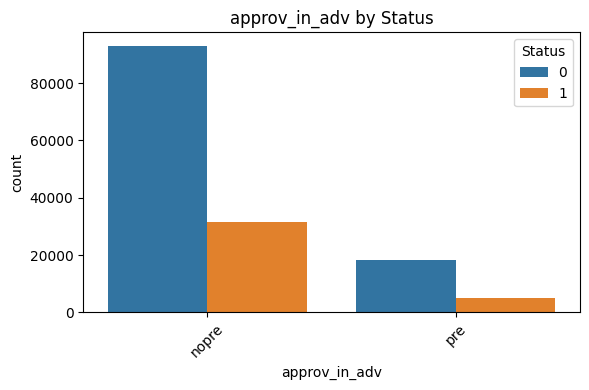

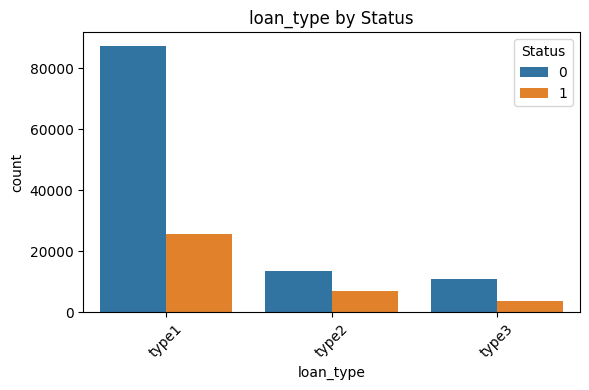

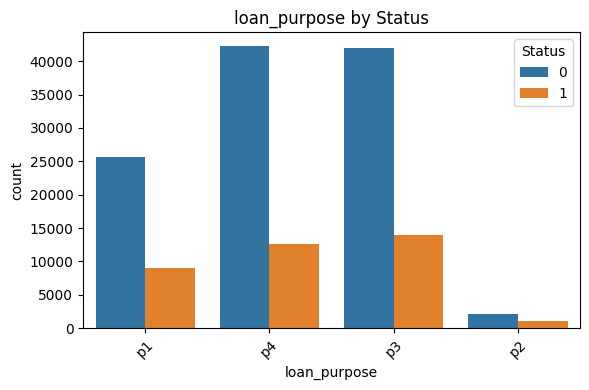

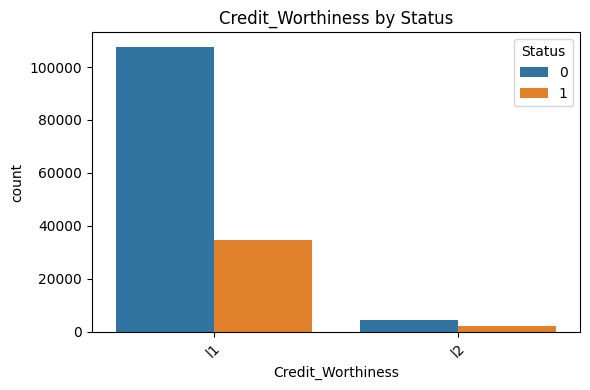

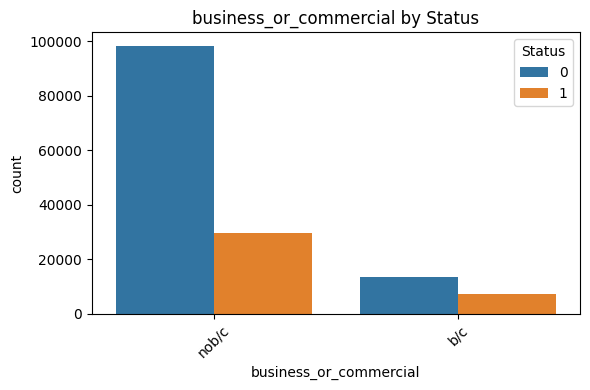

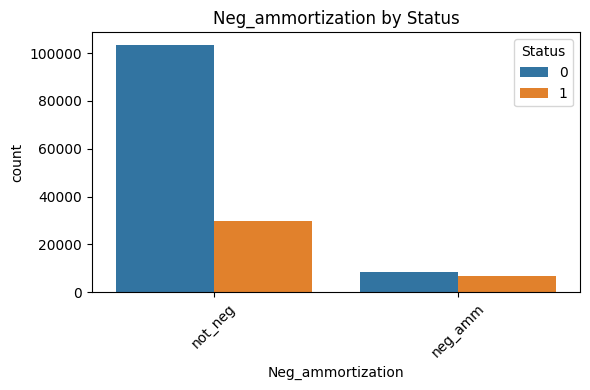

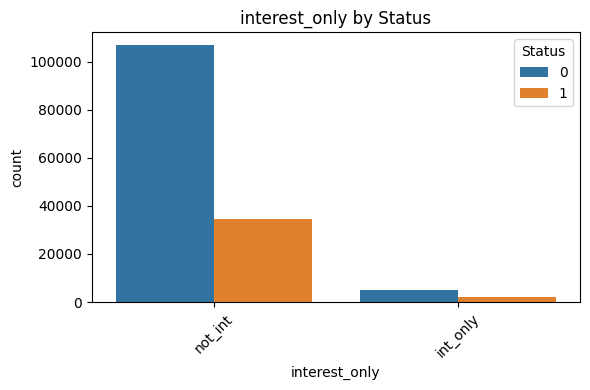

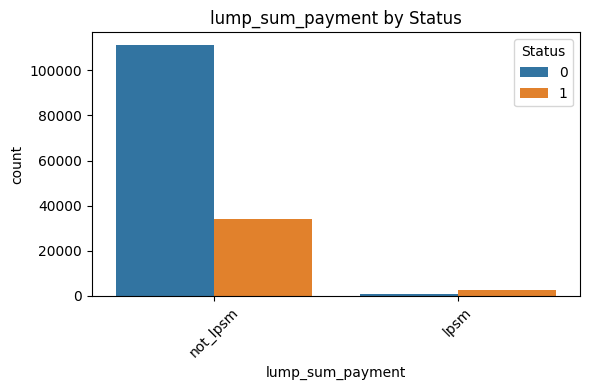

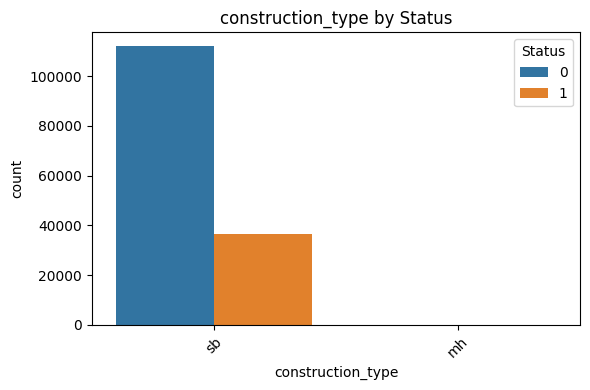

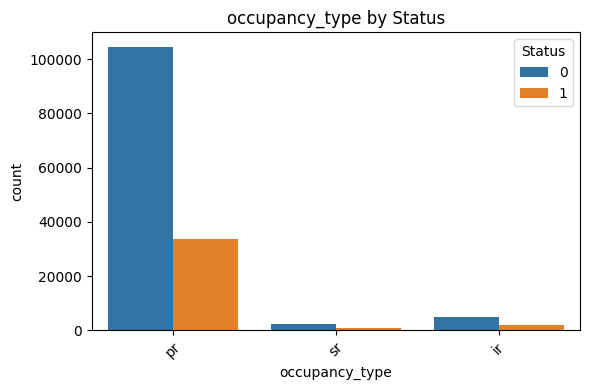

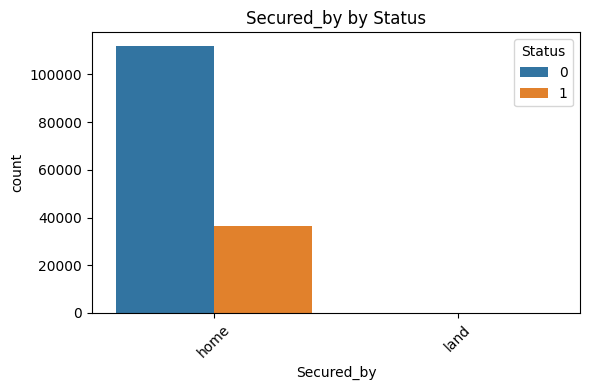

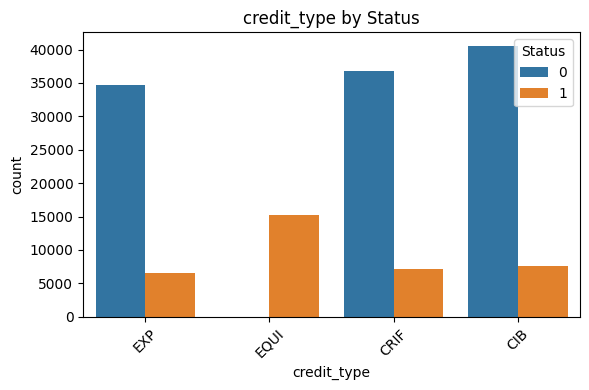

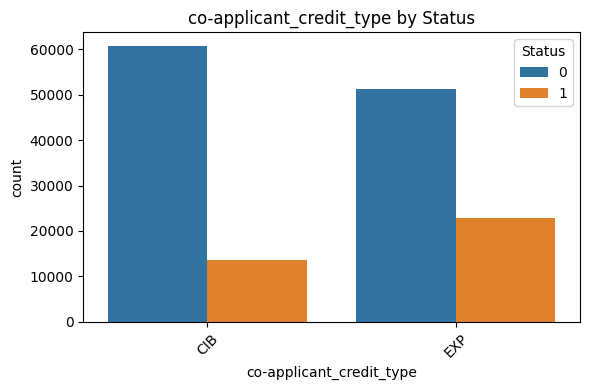

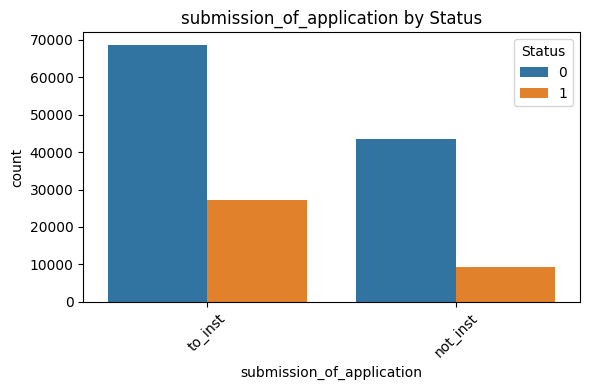

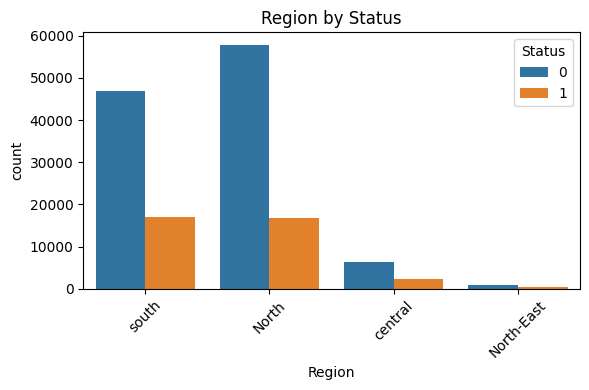

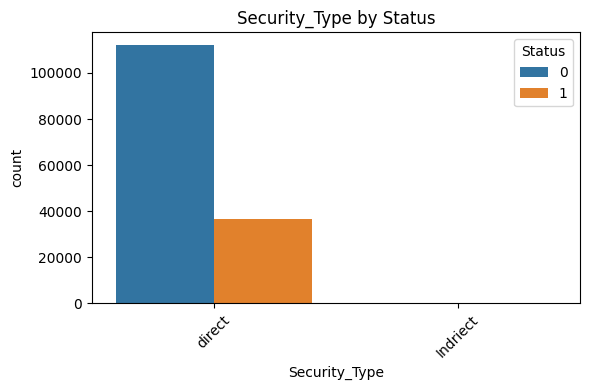

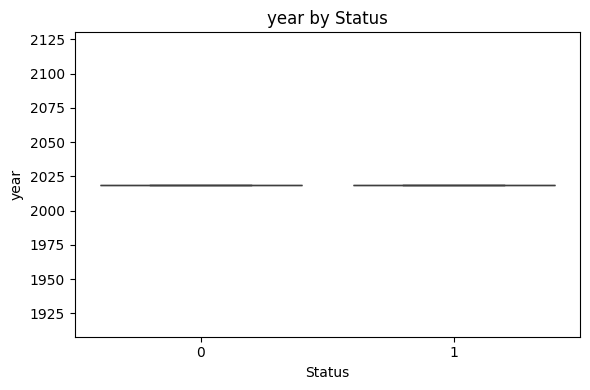

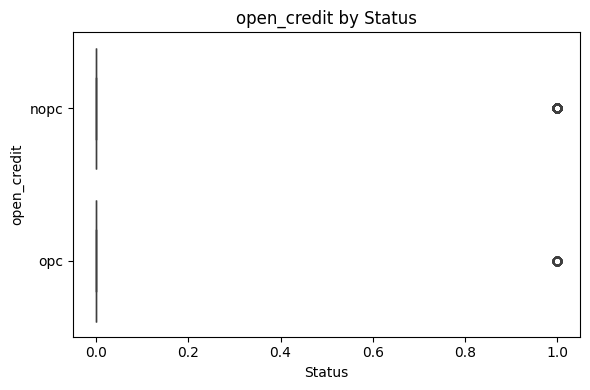

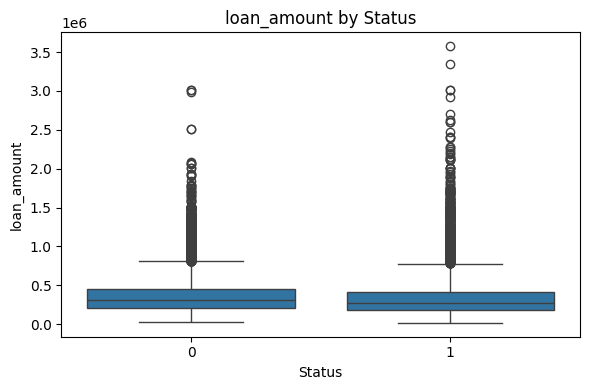

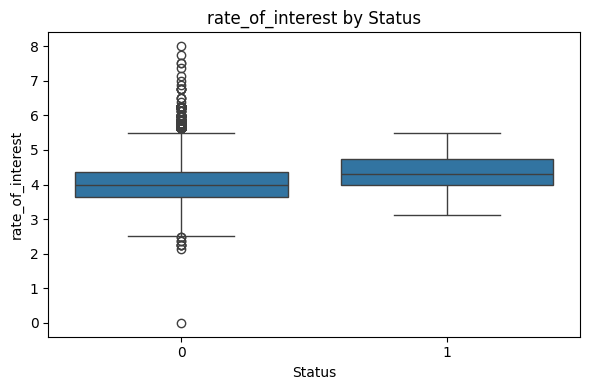

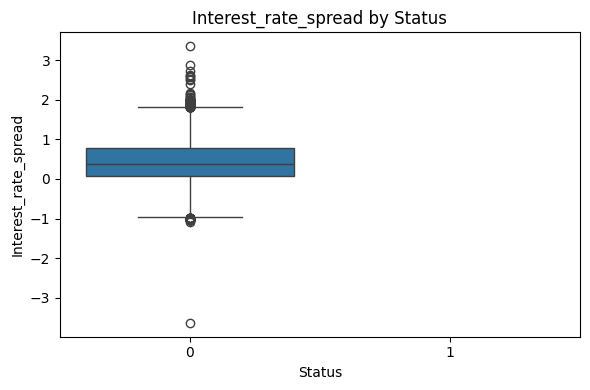

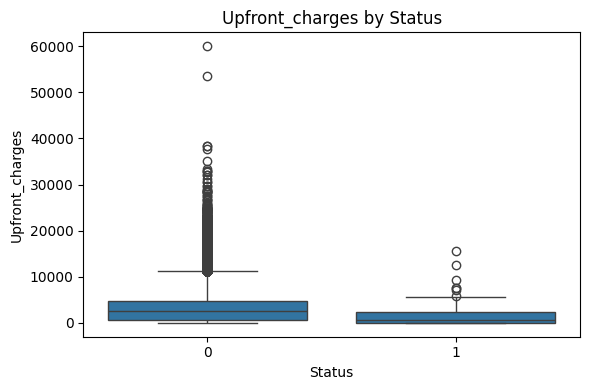

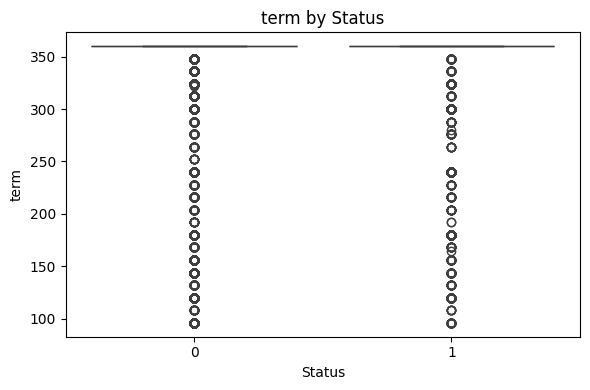

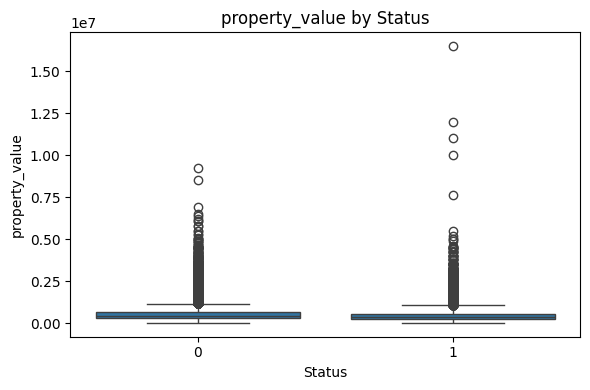

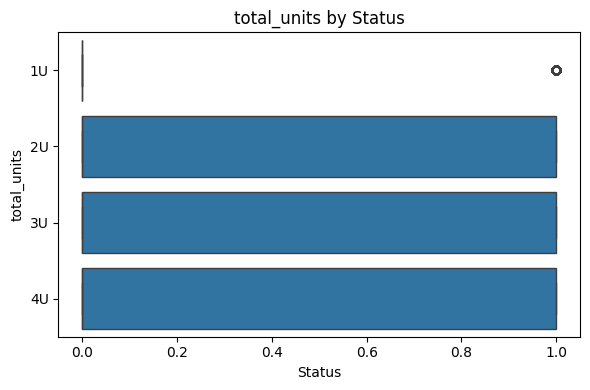

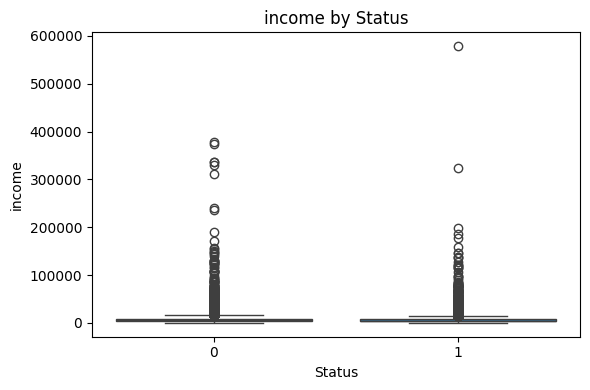

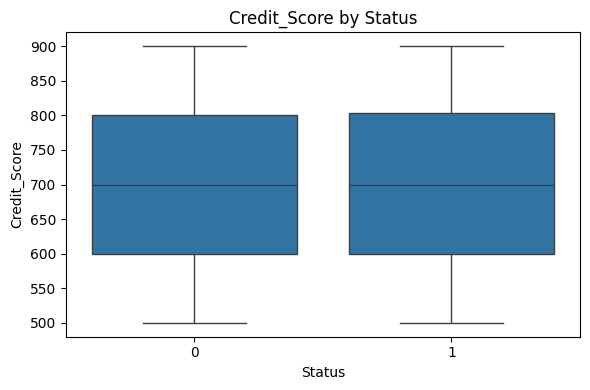

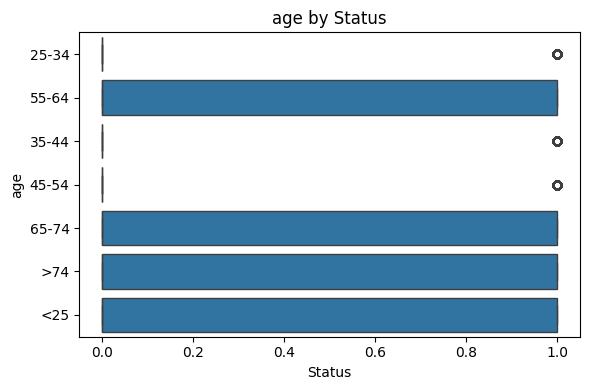

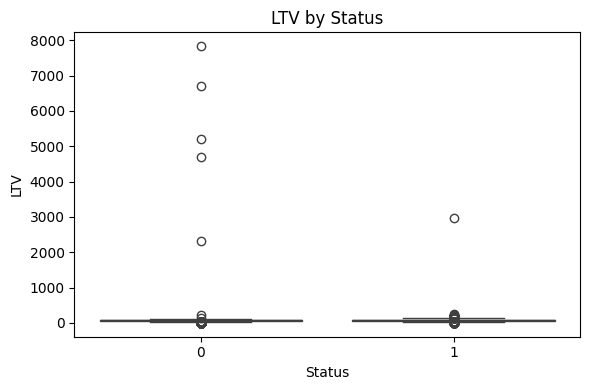

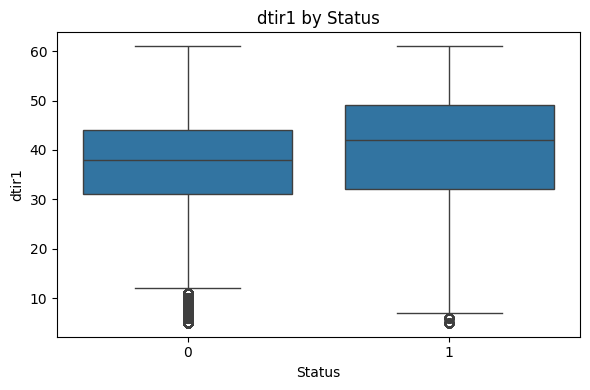

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = [
    'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
    'Credit_Worthiness', 'business_or_commercial', 'Neg_ammortization',
    'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type',
    'Secured_by', 'credit_type', 'co-applicant_credit_type',
    'submission_of_application', 'Region', 'Security_Type'
]

numerical_features = [
    'year', 'open_credit', 'loan_amount', 'rate_of_interest',
    'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
    'total_units', 'income', 'Credit_Score', 'age', 'LTV', 'dtir1'
]

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Status', data=df)
    plt.title(f"{col} by Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Status', y=col, data=df)
    plt.title(f"{col} by Status")
    plt.tight_layout()
    plt.show()

In [4]:
def calculate_credit_worthiness(
    credit_score, income_usd, dtir1, open_credit, loan_amount_usd, age,
    business_or_commercial, property_value_usd, LTV, term, rate_of_interest,
    neg_ammortization, interest_only, lump_sum_payment
):
    score = 0

    # Credit score
    if credit_score >= 700:
        score += 2
    elif credit_score >= 600:
        score += 1

    # Income (in USD)
    if income_usd > (50000/325):
        score += 2
    elif income_usd > (30000/325):
        score += 1

    # DTI
    if dtir1 < 35:
        score += 2
    elif dtir1 < 45:
        score += 1

    # Open credit lines
    if open_credit <= 3:
        score += 1
    elif open_credit > 7:
        score -= 1

    # Loan amount vs property value (in USD)
    if loan_amount_usd < property_value_usd:
        score += 1

    # Age
    if age >= 30:
        score += 1

    # Business or commercial loan
    if business_or_commercial == "No":
        score += 1

    # LTV
    if LTV < 80:
        score += 1
    elif LTV > 90:
        score -= 1

    # Term
    if term < 240:
        score += 1

    # Rate of interest
    if rate_of_interest < 10:
        score += 1
    elif rate_of_interest > 15:
        score -= 1

    # Loan features
    if neg_ammortization == "No":
        score += 1
    if interest_only == "No":
        score += 1
    if lump_sum_payment == "Yes":
        score += 1

    # Final decision
    if score >= 10:
        return "Good"
    elif score >= 6:
        return "Average"
    else:
        return "Bad"

In [5]:
df=df.drop(columns=['Credit_Worthiness'])

In [6]:
# Convert columns to appropriate types
df['open_credit'] = pd.to_numeric(df['open_credit'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

df['Credit_Worthiness'] = df.apply(
    lambda row: calculate_credit_worthiness(
        row['Credit_Score'], row['income'], row['dtir1'], row['open_credit'],
        row['loan_amount'], row['age'], row['business_or_commercial'],
        row['property_value'], row['LTV'], row['term'], row['rate_of_interest'],
        row['Neg_ammortization'], row['interest_only'], row['lump_sum_payment']
    ),
    axis=1
)

In [7]:
df = df.drop(columns=[
    'Credit_Score', 'income', 'open_credit', 'age',
    'business_or_commercial', 'term',
    'Neg_ammortization', 'interest_only', 'lump_sum_payment'
])


In [ ]:
df

In [8]:
df=df.drop(columns=['LTV'])

In [9]:
df['LTV'] = ( df['loan_amount']/df['property_value'])

In [10]:
df=df.drop(columns=['Interest_rate_spread'])

In [11]:
benchmark_rate = 6.5 
df['Interest_rate_spread'] = df['rate_of_interest'] - benchmark_rate

In [12]:
df=df.drop(columns=['Upfront_charges'])

In [13]:
df['Upfront_charges'] = df['loan_amount'] * 0.01


In [ ]:
df

In [14]:
df=df.drop(columns=['loan_amount','property_value','loan_type','loan_purpose','rate_of_interest','construction_type'])

In [15]:
df

,ID,year,loan_limit,Gender,approv_in_adv,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,submission_of_application,Region,Security_Type,Status,dtir1,Credit_Worthiness,LTV,Interest_rate_spread,Upfront_charges
0,24890,2019,cf,Sex Not Available,nopre,pr,home,1U,EXP,CIB,to_inst,south,direct,1,45.0,Bad,0.987288,NaN,1165.0
1,24891,2019,cf,Male,nopre,pr,home,1U,EQUI,EXP,to_inst,North,direct,1,NaN,Bad,NaN,NaN,2065.0
2,24892,2019,cf,Male,pre,pr,home,1U,EXP,CIB,to_inst,south,direct,0,46.0,Average,0.800197,-1.940,4065.0
3,24893,2019,cf,Male,nopre,pr,home,1U,EXP,CIB,not_inst,North,direct,0,42.0,Average,0.693769,-2.250,4565.0
4,24894,2019,cf,Joint,pre,pr,home,1U,CRIF,EXP,not_inst,North,direct,0,39.0,Bad,0.918865,-2.500,6965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,pr,home,1U,CIB,EXP,to_inst,south,direct,0,48.0,Average,0.717928,-3.375,4365.0
148666,173556,2019,cf,Male,nopre,ir,home,4U,CIB,CIB,not_inst,south,direct,0,15.0,Average,0.744289,-1.310,5865.0
148667,173557,2019,cf,Male,nopre,pr,home,1U,CIB,EXP,not_inst,North,direct,0,49.0,Average,0.613324,-3.375,4465.0
148668,173558,2019,cf,Female,nopre,pr,home,1U,EXP,EXP,to_inst,North,direct,0,29.0,Good,0.706835,-3.000,1965.0


In [19]:
df['occupancy_type'].value_counts()

occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64

In [30]:
df=df.drop(columns=['occupancy_type'])

In [31]:
df

,ID,year,loan_limit,Gender,approv_in_adv,Secured_by,total_units,credit_type,co-applicant_credit_type,submission_of_application,Region,Security_Type,Status,dtir1,Credit_Worthiness,LTV,Interest_rate_spread,Upfront_charges
0,24890,2019,cf,Sex Not Available,nopre,home,1U,EXP,CIB,to_inst,south,direct,1,45.0,Bad,0.987288,NaN,1165.0
1,24891,2019,cf,Male,nopre,home,1U,EQUI,EXP,to_inst,North,direct,1,NaN,Bad,NaN,NaN,2065.0
2,24892,2019,cf,Male,pre,home,1U,EXP,CIB,to_inst,south,direct,0,46.0,Average,0.800197,-1.940,4065.0
3,24893,2019,cf,Male,nopre,home,1U,EXP,CIB,not_inst,North,direct,0,42.0,Average,0.693769,-2.250,4565.0
4,24894,2019,cf,Joint,pre,home,1U,CRIF,EXP,not_inst,North,direct,0,39.0,Bad,0.918865,-2.500,6965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,home,1U,CIB,EXP,to_inst,south,direct,0,48.0,Average,0.717928,-3.375,4365.0
148666,173556,2019,cf,Male,nopre,home,4U,CIB,CIB,not_inst,south,direct,0,15.0,Average,0.744289,-1.310,5865.0
148667,173557,2019,cf,Male,nopre,home,1U,CIB,EXP,not_inst,North,direct,0,49.0,Average,0.613324,-3.375,4465.0
148668,173558,2019,cf,Female,nopre,home,1U,EXP,EXP,to_inst,North,direct,0,29.0,Good,0.706835,-3.000,1965.0


In [32]:
df['Secured_by'].value_counts()

Secured_by
home    148637
land        33
Name: count, dtype: int64

In [33]:
df=df.drop(columns=['Secured_by'])

In [34]:
df

,ID,year,loan_limit,Gender,approv_in_adv,total_units,credit_type,co-applicant_credit_type,submission_of_application,Region,Security_Type,Status,dtir1,Credit_Worthiness,LTV,Interest_rate_spread,Upfront_charges
0,24890,2019,cf,Sex Not Available,nopre,1U,EXP,CIB,to_inst,south,direct,1,45.0,Bad,0.987288,NaN,1165.0
1,24891,2019,cf,Male,nopre,1U,EQUI,EXP,to_inst,North,direct,1,NaN,Bad,NaN,NaN,2065.0
2,24892,2019,cf,Male,pre,1U,EXP,CIB,to_inst,south,direct,0,46.0,Average,0.800197,-1.940,4065.0
3,24893,2019,cf,Male,nopre,1U,EXP,CIB,not_inst,North,direct,0,42.0,Average,0.693769,-2.250,4565.0
4,24894,2019,cf,Joint,pre,1U,CRIF,EXP,not_inst,North,direct,0,39.0,Bad,0.918865,-2.500,6965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,1U,CIB,EXP,to_inst,south,direct,0,48.0,Average,0.717928,-3.375,4365.0
148666,173556,2019,cf,Male,nopre,4U,CIB,CIB,not_inst,south,direct,0,15.0,Average,0.744289,-1.310,5865.0
148667,173557,2019,cf,Male,nopre,1U,CIB,EXP,not_inst,North,direct,0,49.0,Average,0.613324,-3.375,4465.0
148668,173558,2019,cf,Female,nopre,1U,EXP,EXP,to_inst,North,direct,0,29.0,Good,0.706835,-3.000,1965.0


In [35]:
df['total_units'].value_counts()

total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64

In [36]:
df['credit_type'].value_counts()

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64

In [39]:
df=df.drop(columns=['Security_Type'])

In [40]:
df

,ID,year,loan_limit,Gender,approv_in_adv,total_units,credit_type,co-applicant_credit_type,submission_of_application,Region,Status,dtir1,Credit_Worthiness,LTV,Interest_rate_spread,Upfront_charges
0,24890,2019,cf,Sex Not Available,nopre,1U,EXP,CIB,to_inst,south,1,45.0,Bad,0.987288,NaN,1165.0
1,24891,2019,cf,Male,nopre,1U,EQUI,EXP,to_inst,North,1,NaN,Bad,NaN,NaN,2065.0
2,24892,2019,cf,Male,pre,1U,EXP,CIB,to_inst,south,0,46.0,Average,0.800197,-1.940,4065.0
3,24893,2019,cf,Male,nopre,1U,EXP,CIB,not_inst,North,0,42.0,Average,0.693769,-2.250,4565.0
4,24894,2019,cf,Joint,pre,1U,CRIF,EXP,not_inst,North,0,39.0,Bad,0.918865,-2.500,6965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,1U,CIB,EXP,to_inst,south,0,48.0,Average,0.717928,-3.375,4365.0
148666,173556,2019,cf,Male,nopre,4U,CIB,CIB,not_inst,south,0,15.0,Average,0.744289,-1.310,5865.0
148667,173557,2019,cf,Male,nopre,1U,CIB,EXP,not_inst,North,0,49.0,Average,0.613324,-3.375,4465.0
148668,173558,2019,cf,Female,nopre,1U,EXP,EXP,to_inst,North,0,29.0,Good,0.706835,-3.000,1965.0


In [42]:
y = df['Status']
X = df[['loan_limit','Gender', 'LTV', 'dtir1','approv_in_adv','Credit_Worthiness','credit_type','co-applicant_credit_type','Interest_rate_spread','submission_of_application','Region']]
X.columns

Index(['loan_limit', 'Gender', 'LTV', 'dtir1', 'approv_in_adv',
       'Credit_Worthiness', 'credit_type', 'co-applicant_credit_type',
       'Interest_rate_spread', 'submission_of_application', 'Region'],
      dtype='object')

In [43]:
X = X.fillna(X.median(numeric_only=True))
X = pd.get_dummies(X, drop_first=True)
X.isna().sum()

LTV                                  0
dtir1                                0
Interest_rate_spread                 0
loan_limit_ncf                       0
Gender_Joint                         0
Gender_Male                          0
Gender_Sex Not Available             0
approv_in_adv_pre                    0
Credit_Worthiness_Bad                0
Credit_Worthiness_Good               0
credit_type_CRIF                     0
credit_type_EQUI                     0
credit_type_EXP                      0
co-applicant_credit_type_EXP         0
submission_of_application_to_inst    0
Region_North-East                    0
Region_central                       0
Region_south                         0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
# %pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X_train, y_train)

In [46]:
Y_resampled.value_counts()

Status
0    89625
1    89625
Name: count, dtype: int64

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,   # limit tree depth
    random_state=42
)


# Train
rf.fit(X_resampled, Y_resampled)


RandomForestClassifier(max_depth=5, random_state=42)

In [48]:
y_pred= rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
rf.score(X_test, y_test)

0.9184099011232932

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=[str(c) for c in rf.classes_]))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     22406
           1       0.79      0.91      0.85      7328

    accuracy                           0.92     29734
   macro avg       0.88      0.92      0.90     29734
weighted avg       0.93      0.92      0.92     29734



In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, preds)
    }

print("Random Forest:", evaluate(rf, X_test, y_test))


Random Forest: {'Accuracy': 0.9184099011232932, 'Precision': 0.790471675752548, 'Recall': 0.910207423580786, 'F1': 0.8461245718635036, 'ROC-AUC': 0.9156499940362199}


In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.8738615726104797


In [55]:
import joblib
joblib.dump(rf, 'best_loan_default_model.pkl')

['best_loan_default_model.pkl']

In [56]:
import joblib
joblib.dump(list(X.columns), 'X_columns.pkl')

['X_columns.pkl']